In [2]:
import umap.umap_ as umap
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
from matplotlib.patches import Polygon
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.stats import gaussian_kde
import seaborn as sns
from matplotlib.patches import Rectangle

(500, 1, 400)
(500, 400)
(500, 400)


/Users/david/miniforge3/envs/myenv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


(500, 2)
(500, 2)
TSNE
UMAP
outliers 1:
Beak - boomy.mp3
Deez Nuts - boomy.mp3
Dookie - boomy.mp3
Life Is Fair - boomy.mp3
Love Yourself - boomy.mp3
Phone Call With A Friend - boomy.mp3
Shake That Booty Like Garfield - boomy.mp3
Start My Fire - boomy.mp3
The Drum Solo - boomy.mp3


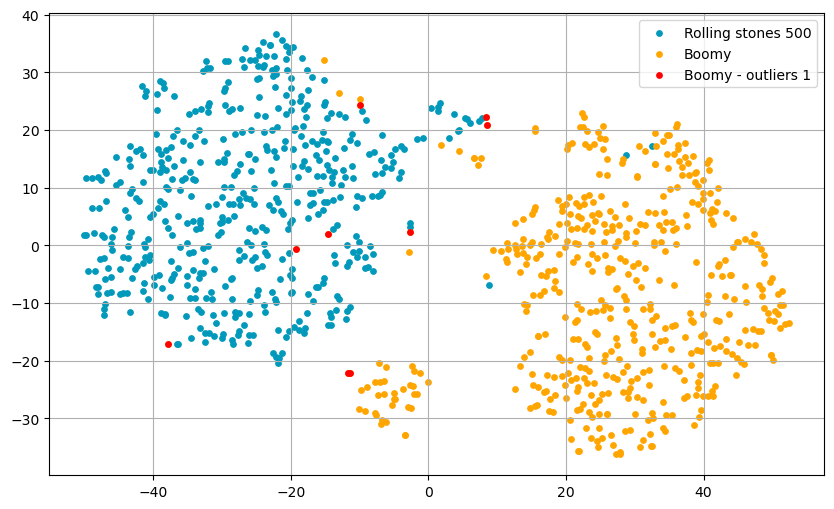

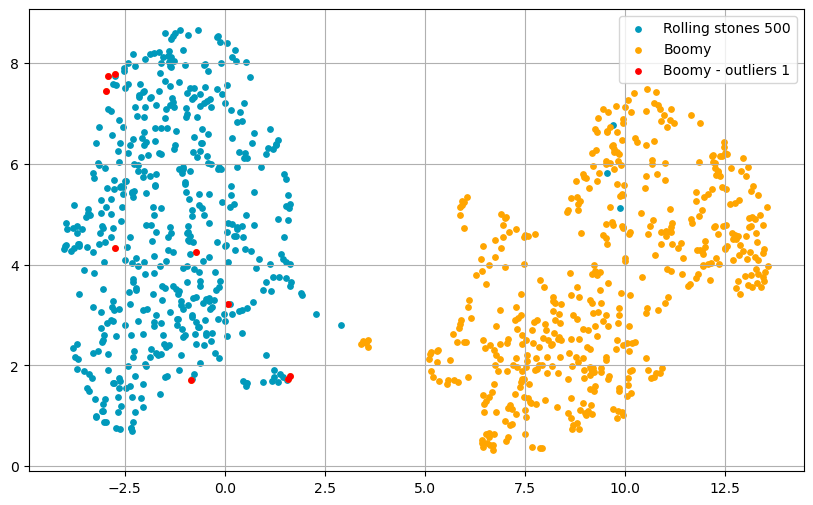

In [25]:

# Set the random seed for reproducibility
np.random.seed(0)
# %%
# load the file "/Users/lcros/Downloads/penultimate_array.npy" 
boomy = np.load("../data/penultimate_array.npy")
print(boomy.shape)
# load titles from /Users/lcros/Downloads/titles.npy
titles = np.load("../data/titles.npy", allow_pickle=True)

#%%
# remove the middle dimension
boomy = boomy.reshape(boomy.shape[0], boomy.shape[-1])
# %%
# VISUALIZE THE TUNES USING TSNE and UMAP

# load real from the file "/Users/lcros/Downloads/penultimate_array_rollingStones.npy"
real = np.load("../data/penultimate_array_rollingStones.npy")
# remove the middle dimension
real = real.reshape(real.shape[0], real.shape[-1])
# boomy = []

# %%
print(real.shape)
print(boomy.shape)
# %%
# create a TSNE object and fit the data of both real and boomy
all_tsne = TSNE(n_components=2, perplexity=20, n_iter=1000, init='pca',
                random_state=10, learning_rate='auto').fit_transform(np.concatenate((real, boomy), axis=0))
real_tsne = all_tsne[0:len(real)]
gen_tsne = all_tsne[len(real):]

# Umap is also a good alternative
all_umap = umap.UMAP(n_components=2, n_neighbors=5,
                        min_dist=0.3, metric='correlation', random_state=10).fit_transform(np.concatenate((real, boomy), axis=0))
real_umap = all_umap[0:len(real)]
gen_umap = all_umap[len(real):]

#%%
print(real_tsne.shape)
print(gen_tsne.shape)

# %%
# get the index of the tune that contains 'onkey' in the title
idx = np.where([True if 'onkey' in title else False for title in titles])[0][0]


#%%
# visualize the tunes in a 2D scatter plot
print('TSNE')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(real_tsne[:, 0], real_tsne[:, 1], c = '#0099bb', label='Rolling stones 500', s = 15)
ax.scatter(gen_tsne[:, 0], gen_tsne[:, 1], c='orange', label='Boomy', s = 15)
idxs1 = np.where((gen_umap[:, 0] < 2.5))[0]
# get where gen_umap[:, 1] > 6 & gen_umap[:,0] < -0.4 as idx2
idxs2 = np.where((gen_umap[:, 1] > 6) & (gen_umap[:, 0] < -0.4))[0]
# plot the tunes in idxs1 in a different color
ax.scatter(gen_tsne[idxs1, 0], gen_tsne[idxs1, 1], c='red', label='Boomy - outliers 1', s = 15)
# # plot the tunes in idxs2 in a different color
# ax.scatter(gen_tsne[idxs2, 0], gen_tsne[idxs2, 1], c='y', label='Boomy - outliers 2')
# # plot the tune that contains 'onkey' in the title in a different color
# ax.scatter(gen_tsne[idx, 0], gen_tsne[idx, 1], c='r', label='Monkey')
ax.grid()
ax.legend()
# %%
# visualize the tunes in a 2D scatter plot with Umap
print('UMAP')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(real_umap[:, 0], real_umap[:, 1], c = '#0099bb', label='Rolling stones 500', s = 15)
ax.scatter(gen_umap[:, 0], gen_umap[:, 1], c='orange', label='Boomy', s = 15)
ax.scatter(gen_umap[idxs1, 0], gen_umap[idxs1, 1], c='red', label='Boomy - outliers 1', s = 15)
# ax.scatter(gen_umap[idxs2, 0], gen_umap[idxs2, 1], c='y', label='Boomy - outliers 2')
# ax.scatter(gen_umap[idx, 0], gen_umap[idx, 1], c='r', label='Monkey')
ax.grid()
ax.legend()

#%%
# # print the names of the tunes that are in the left side of the scatter plot
print('outliers 1:')
for i in idxs1:
    print(titles[i])

# # print the names of the tunes that are in the right side of the scatter plot
# print('\noutliers 2:')
# for i in idxs2:
#     print(titles[i])
